# IMPORT

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
import time
from shapely.geometry import box,LineString,Point,MultiPoint,MultiLineString,MultiPolygon,Polygon
from shapely.ops import unary_union
import socket
current_dir = os.path.join(os.getcwd()) 
mother_path = os.path.abspath(os.path.join(current_dir, os.pardir))
print('mother_path:', mother_path)
sys.path.append(os.path.join(mother_path, 'PreProcessing'))
sys.path.append(os.path.join(mother_path))
from FittingProcedures import *
from plot import *
from Potential import *
from Grid import *
from PreprocessingObj import *
from ODfromfma import *
import time
from GeometrySphere import *
from Polycentrism import *
#import rustworkx as rw
import ast
## BASIC PARAMS
plt.rcParams.update({
    "text.usetex": False,
})

if socket.gethostname()=='artemis.ist.berkeley.edu':
    TRAFFIC_DIR = '/home/alberto/LPSim/traffic_phase_transition'
else:
    TRAFFIC_DIR = os.getenv('TRAFFIC_DIR')
name = 'BOS'
grid_size = 0.02
hexagon_resolution = 8
dir_grid = os.path.join(TRAFFIC_DIR,'data','carto',name,'grid',str(grid_size))

## BASIC NEEDED OBJECTS
SFO_obj = GeometricalSettingsSpatialPartition(name,TRAFFIC_DIR)
bbox = SFO_obj.bounding_box
minx, miny, maxx, maxy = bbox
dir_geometries = os.path.join(TRAFFIC_DIR,'data','carto','{0}'.format(name))
grid = GetGrid(grid_size,SFO_obj.bounding_box,'EPSG:4326',dir_geometries)
df_distance,FoundDistMat = GetDirectionMatrix(dir_geometries,grid_size)
Tij = GetODGrid(dir_geometries,str(grid_size))
lattice = nx.read_graphml(os.path.join(dir_grid,"centroid_lattice.graphml"))
#VectorField = pd.read_csv('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/grid/0.02/VectorField.csv')
#Potential = pd.read_csv('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/grid/0.02/PotentialDataFrame.csv')

# GET POTENTIAL AND VECTOR FIELD
VectorField = GetVectorField(Tij,df_distance)
VectorFieldDir = os.path.join(TRAFFIC_DIR,'data','carto',name,'grid',str(grid_size))
lattice = GetPotentialLattice(lattice,VectorField)
lattice = SmoothPotential(lattice)
PotentialDataframe = ConvertLattice2PotentialDataframe(lattice)
PotentialDataframe = CompletePotentialDataFrame(VectorField,grid,PotentialDataframe)



mother_path: /home/aamad/Desktop/phd/berkeley/traffic_phase_transition/scripts


/home/aamad/anaconda3/envs/geostuff/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Initialize Grid: 0.02
ALREADY COMPUTED


In [2]:
#import swifter
# Assuming gdf_polygons and grid are GeoDataFrames
# gdf_polygons contains polygons of the geographic area
# grid contains polygons covering the bounding box taken from the unary union

# Perform a spatial join to get the boundary of gdf_polygons
boundary = gpd.overlay(SFO_obj.gdf_polygons, SFO_obj.gdf_polygons, how='union',keep_geom_type=False).unary_union
if isinstance(boundary, Polygon):
    boundary_line = LineString(boundary.exterior.coords)
elif isinstance(boundary, MultiPolygon):
    exterior_coords = []
    for polygon in boundary.geoms:
        exterior_coords.extend(polygon.exterior.coords)
    boundary_line = LineString(exterior_coords)
# Add a column to grid indicating the position relative to the boundary
#grid['position'] = ''

#grid['position'] = grid.geometry.swifter.apply(lambda x: 'inside' if x.within(boundary) else ('edge' if x.touches(boundary) else 'outside'))
grid['position'] = grid.geometry.apply(lambda x: 'inside' if x.within(boundary) else ('edge' if x.touches(boundary) else 'outside'))
from shapely.geometry import box,LineString,Point,MultiPoint,MultiLineString,MultiPolygon
if isinstance(boundary, Polygon):
    boundary_line = LineString(boundary.exterior.coords)
elif isinstance(boundary, MultiPolygon):
    exterior_coords = []
    for polygon in boundary.geoms:
        exterior_coords.extend(polygon.exterior.coords)
    boundary_line = LineString(exterior_coords)
grid['relation_to_line'] = grid.geometry.apply(lambda poly: 'edge' if boundary_line.crosses(poly) else 'not_edge')

In [3]:
PotentialDataframe

,V_in,V_out,index,node_id,x,y,rotor_z_in,rotor_z_out,Ti,population
0,0.000000,0.000000,0,"(0, 0)",-71.718385,41.772821,0.0,0.0,NaN,0.0
1,0.000000,0.000000,1,"(0, 1)",-71.718385,41.792821,0.0,0.0,NaN,0.0
2,0.000000,0.000000,2,"(0, 2)",-71.718385,41.812821,0.0,0.0,NaN,0.0
3,0.000000,0.000000,3,"(0, 3)",-71.718385,41.832821,0.0,0.0,NaN,0.0
4,0.000000,0.000000,4,"(0, 4)",-71.718385,41.852821,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
3472,-13973.249363,47797.950513,3472,"(60, 52)",-70.526976,42.812821,0.0,0.0,NaN,0.0
3473,-13970.638312,47790.191796,3473,"(60, 53)",-70.526976,42.832821,0.0,0.0,NaN,0.0
3474,-13969.339260,47786.442328,3474,"(60, 54)",-70.526976,42.852821,0.0,0.0,NaN,0.0
3475,-13968.726560,47784.712339,3475,"(60, 55)",-70.526976,42.872821,0.0,0.0,NaN,0.0


# COMPUTE CENTRALITY INDEX (PI)

In [7]:
from tqdm import tqdm
from Polycentrism import *
SumPot = np.sum(PotentialDataframe['V_out']) 
NumGridEdge = grid[grid['relation_to_line']=='edge'].shape[0]
IndexEdge = PotentialDataframe[PotentialDataframe['V_out']>0]['index'].values
distance_vector,potential_vector = PrepareJitCompiledComputeV(df_distance,GetIndexEdgePolygon(grid),SumPot,NumGridEdge,PotentialDataframe,case = 'Vmax')
Vmax = ComputeJitV(distance_vector,potential_vector)
distance_vector,potential_vector = PrepareJitCompiledComputeV(df_distance,IndexEdge,SumPot,NumGridEdge,PotentialDataframe,case = 'V')
V = ComputeJitV(distance_vector,potential_vector)
PI = ComputePI(V,Vmax)
print('PI: ',PI)

PI:  0.8550464358285889


In [47]:
print('MaxV:',Vmax)
print('SumPot:',SumPot)
print('NumGridEdge:',NumGridEdge)
print('SumPot/MaxV:',SumPot/Vmax)

MaxV: 9591917081591.98
SumPot: 652466586.9657321
NumGridEdge: 523
SumPot/MaxV: 6.802254246107823e-05


# MODIFY POPULATION 

### PLOT OD

In [ ]:
import igraph as ig
import time
from matplotlib.cm import inferno
from matplotlib.colors import Normalize

# CREATE GRAPH 
ig_G = ig.Graph()
ig_G.add_vertices(grid['index'])
pos = [[row['centroidx'],row['centroidy']] for id,row in grid.iterrows()]
ig_G.vs["pos"] = pos
layout = pos
edges = [(row.origin, row.destination) for row in Tij.itertuples(index=False) if row.number_people>0]
edges_with_weights = [(row.origin, row.destination, row.number_people) for row in Tij.itertuples(index=False) if row.number_people > 0]
# Add edges to igraph graph with weights
ig_G.add_edges([(e[0], e[1]) for e in edges_with_weights])  # Add edges without weights first
ig_G.es["weights"] = [e[2] for e in edges_with_weights]  # Assign weights to edges

# DEFINE MAX/MIN WEIGHTS for CMAP
min_weight = min(ig_G.es["weights"])
max_weight = max(ig_G.es["weights"])
normalized_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in ig_G.es["weights"]]

# SELECT 5% NODES WITH HIGHER DEGREE
degrees = ig_G.degree()
sorted_nodes = sorted(range(len(degrees)), key=lambda x: degrees[x], reverse=True)
top_5_percent = int(len(degrees) * 0.001)
top_nodes = sorted_nodes[:top_5_percent]
selected_edges = [(edge.source, edge.target) for edge in ig_G.es if edge.source in top_nodes]
subgraph_edges = ig_G.subgraph_edges(selected_edges)

#BOUNDING BOX SELECTION
cmap = inferno
norm = Normalize(vmin=min_weight, vmax=max_weight)
normalized_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in ig_G.es["weights"]]
bbox = SFO_obj.gdf_polygons.total_bounds
#layout_G = ig_G.layout(coords = )
# PLOT
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ig.plot(subgraph_edges, layout = ig_G.vs["pos"], bbox=(0,0,1000,1000), vertex_size=2, vertex_color='lightblue',
        edge_color=[(0, 0, 0, weight / max_weight) for weight in subgraph_edges.es["weights"]], target=ax)
#SFO_obj.gdf_polygons.plot(ax=ax, color='none', edgecolor='black')

#plt.gca().set_aspect('equal')  # Set aspect ratio to equal
#plt.gca().set_axis_off()  # Turn off axes
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#cbar = plt.colorbar(sm, ax=ax)
#cbar.set_label('Edge Weight')
#plt.title('Edges from Top 5% Nodes with Highest Degree')
plt.show()


# PLOT THE CIRCUITATION

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import ast
def safe_literal_eval(s):
    if ',' not in s:
        s1 = s.split(' ')
        if len(s1)==2:
            return [float(s1[0].replace('[','')),float(s1[1].replace(']',''))]      # Add commas between elements
        elif len(s1)!=2:
            s1 = s.split('  ')
            if len(s1) ==2:
                return [float(s1[0].replace('[','')),float(s1[1].replace(']',''))]      # Add commas between elements
            elif len(s1)!=2:
                s1 = s.split('   ')
                return [float(s1[0].replace('[','')),float(s1[1].replace(']',''))]      # Add commas between elements
    else:
        try:
            return ast.literal_eval(s)
        except SyntaxError:
            # Handle SyntaxError here
            print("SyntaxError: Invalid syntax in the input string")
            return None

def GetCenterMapIdx(grid):
    mean_x = grid['geometry'].centroid.x.mean()
    mean_y = grid['geometry'].centroid.y.mean()
    # Create a Point geometry for the center of mass
    center_of_mass = Point(mean_x, mean_y)
    distances = grid['geometry'].centroid.distance(center_of_mass)
    # Find the index of the row with the minimum distance
    closest_row_index = distances.idxmin()
    print("Index of the row closest to the center of mass:")
    print(closest_row_index)
    return closest_row_index

def QuiverEdge(ax,coordinates,index2choose,color):
    for i in range(len(coordinates)-1):
        x1 = coordinates[i]
        x2 = coordinates[i+1] 
        if i in index2choose:
            ax.quiver(x1[0], x1[1],x2[0] - x1[0],x2[1] - x1[1], color=color, linewidth=2)


def CreateListIndicesSquareLoop(startIdx,n_rows):
    return [startIdx -1,startIdx,startIdx + n_rows,startIdx + n_rows -1]

def CreateClosedLoopSquare(grid,startIdx,n_rows,VectorField):
    indicesDF_loop = CreateListIndicesSquareLoop(startIdx,n_rows)
    LoopCircuit = []
    LoopVF = []
    for i in range(len(indicesDF_loop)-1):
        LoopCircuit.append(list(grid['geometry'][indicesDF_loop[i]].boundary.coords)[i:i+1])
        LoopVF.append(list(safe_literal_eval(VectorField['Ti'][indicesDF_loop[i]]))) 
    LoopVF.append(list(safe_literal_eval(VectorField['Ti'][indicesDF_loop[i+1]]))) 
    return LoopCircuit,LoopVF

def QuiverCircuitation(LoopCircuit,LoopVF,ax):
    Circuitation = 0
    for i in range(len(LoopCircuit)-1):
        x1 = LoopCircuit[i][0]
        x2 = LoopCircuit[i+1][0]
        vx = LoopVF[i][0]
        vy = LoopVF[i][1]
        print(x1,x2,vx,vy)
        Circuitation += (x2[0] - x1[0])*vx + (x2[1] - x1[1])*vy
        ax.quiver(x1[0], x1[1],x2[0] - x1[0],x2[1] - x1[1], color='red', linewidth=2)
        ax.quiver(x1[0], x1[1],vx,vy, color='yellow', linewidth=2)
    return Circuitation



closest_row_index = GetCenterMapIdx(grid)
## GET THE NUMBER OF ROW AND COLS FOR YOUR GRID (It depends on the resolution)
n_rows = 57
n_cols = 61

fig, ax = plt.subplots(figsize=(10, 10))
#indices = [True if (i>(closest_row_index -3) & i<(closest_row_index + 3)) or (i>(closest_row_index +n_rows-3) and i<(closest_row_index +n_rows + 3))   else False for i,row in SFO_obj.gdf_polygons.iterrows()]
#gdf_plot = SFO_obj.gdf_polygons.loc[indices] 
#grid_plot = grid.loc[indices]
SFO_obj.gdf_polygons.plot(ax = ax)
grid.plot(ax=ax, facecolor='none', edgecolor='black')  # Plot the grid without filling
LoopCircuit,LoopVF = CreateClosedLoopSquare(grid,closest_row_index,n_rows,VectorField)
Circuitation = QuiverCircuitation(LoopCircuit,LoopVF,ax)
print(Circuitation)
#loop_edges0 = grid['geometry'][closest_row_index -1].boundary
#loop_edges1 = grid['geometry'][closest_row_index].boundary
#loop_edges2 = grid['geometry'][closest_row_index + n_rows].boundary
#loop_edges3 = grid['geometry'][closest_row_index + n_rows -1].boundary
#coordinates0 = list(loop_edges0.coords)
#coordinates1 = list(loop_edges1.coords)
#coordinates2 = list(loop_edges2.coords)
#coordinates3 = list(loop_edges3.coords)
#QuiverEdge(ax,coordinates0,[0,1],'green')
#QuiverEdge(ax,coordinates1,[1,2],'red')
#QuiverEdge(ax,coordinates2,[2,3],'yellow')
#QuiverEdge(ax,coordinates3,[3,0],'orange')
    
plt.title('Loop with its Edges')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [50]:
print('Average Population in Inhabited grids: ',np.mean(grid['population'].loc[np.where(grid['population']>0)]))
print('Number of Inhabited grids: ',len(grid['population'].loc[np.where(grid['population']>0)]))
print('Number of cells that have less then average population: ',len(grid['population'].loc[grid['population']>np.mean(grid['population'].loc[np.where(grid['population']>0)])]))
print('Fraction of cells that have less then average population: ',len(grid['population'].loc[grid['population']>np.mean(grid['population'].loc[np.where(grid['population']>0)])])/len(grid['population'].loc[np.where(grid['population']>0)]))
print('Average Population in Non-Inhabited grids: ',np.mean(grid['population']))
print('Number of Non-Inhabited grids: ',len(grid['population']))
print('Number of cells that have less then average population: ',len(grid['population'].loc[grid['population']>np.mean(grid['population'])]))
print('Fraction of cells that have less then average population: ',len(grid['population'].loc[grid['population']>np.mean(grid['population'])])/len(grid['population']))
print('Fraction of Inhabited/Non-Inhabited grids: ',len(grid['population'].loc[np.where(grid['population']>0)])/len(grid['population']))
# CHOICE AREA TO STUDY: JUST POPULATED
RestrictedPop = grid['population'].loc[np.where(grid['population']>0)]
# MIN and MAX Pop -> to set the interval for the exponential distribution
MinPop = min(RestrictedPop)
MaxPop = max(RestrictedPop)
# Resolution 
bins = 500
print('Resolution in Population (number of people): ',(MaxPop - MinPop)/bins)
print('Minimum Population Considered: ',MinPop)
print('Maximum Population Considered: ',MaxPop)


Average Population in Inhabited grids:  1960.5355515759077
Number of Inhabited grids:  2319
Number of cells that have less then average population:  556
Fraction of cells that have less then average population:  0.2397585166019836
Average Population in Non-Inhabited grids:  1307.5875594203421
Number of Non-Inhabited grids:  3477
Number of cells that have less then average population:  834
Fraction of cells that have less then average population:  0.23986194995685936
Fraction of Inhabited/Non-Inhabited grids:  0.6669542709232097
Resolution in Population (number of people):  66.88890811188139
Minimum Population Considered:  5.0209312250844166e-05
Maximum Population Considered:  33444.454106150006


### Exponential Distribution Generation Points

In [52]:
# Creation Exponential Distr
PopBins = np.linspace(MinPop,MaxPop,bins)
m0 = np.mean(RestrictedPop)
PopExpo =  np.exp(-PopBins/m0)/np.sum(np.exp(-PopBins/m0))
AverageExpo = np.sum(PopBins*PopExpo)
IdxBinMean = np.where(PopBins<AverageExpo)[0]
CumulativePopExpo = np.cumsum(PopExpo)
print('m0: ',m0)
print('Average Expo: ',AverageExpo)
print('m0 - AverageExpo: ',m0 - AverageExpo)
#print('Cumulative Population Expo: ',CumulativePopExpo)
print('Cumulative at Average: ',CumulativePopExpo[max(IdxBinMean)])


m0:  1960.5355515759077
Average Expo:  1927.2137944051556
m0 - AverageExpo:  33.32175717075211
Cumulative at Average:  0.6289414198712806


# Power Law Distribution Fitted Generation Points

In [51]:
with open('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/potential/FitPlMass.json','r') as f:
    fitplM = json.load(f)
# Data
PopPlBins = np.linspace(MinPop,MaxPop,bins)
PopPl = 11*PopPlBins**(-1.83) 
#PopPl = fitplM['A']*PopPlBins**(fitplM['b']) 
PopPl = PopPl/np.sum(PopPl)
AveragePl = np.sum(PopPl*PopPlBins)
IdxBinsMeanData = min(np.where(PopPl<AveragePl)[0])
CumulativePopData = np.cumsum(PopPl)
print('Average Data: ',np.sum(PopPl*PopPlBins))
print('Teorethical Cumulative at average: ',1/(-1.83 + 1)*(max(PopPlBins)**(-1.83 + 2)-min(PopPlBins)**(-1.83 + 2)))
print('Cumulative at Average: ',CumulativePopData[IdxBinsMeanData])



Average Data:  5.0214110381853496e-05
Teorethical Cumulative at average:  -6.856486584558129
Cumulative at Average:  0.9999999999948642


# Data

In [53]:
binsd = 40
PopData,PopDataBins = np.histogram(RestrictedPop,binsd)
#PopDataBins = np.array([PopDataBins[i] + PopDataBins[i + 1] for i in range(len(PopDataBins)-1)])
PopData = PopData/np.sum(PopData)
AverageData = np.sum(PopData*PopDataBins[:-1])
IdxBinsMeanData = max(np.where(PopData<AverageData)[0])
CumulativePopData = np.cumsum(PopData)
print('Average Data: ',AverageData)
print('Cumulative at Average: ',CumulativePopData[IdxBinsMeanData])


Average Data:  1590.738852438833
Cumulative at Average:  1.0


### Comparison Expo Data

In [ ]:
PopExpo_mesh, PopData_mesh = np.meshgrid(PopExpo, PopData/np.sum(PopData))
heatmap_data = PopExpo_mesh - PopData_mesh
X, Y = np.meshgrid(PopBins, PopDataBins)
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto', origin='lower', extent=[PopBins[0], PopBins[-1], PopDataBins[0], PopDataBins[-1]])
plt.colorbar(label='Difference')

contour = plt.contour(X, Y, heatmap_data, levels=[0], colors='black', linewidths=2)
#plt.clabel(contour, inline=True, fontsize=10)
plt.xlabel('Population')
plt.ylabel('Population (Data)')
plt.title('exp(-Pop/m0)/m0 - Pdata, m0 = '.format(round(m0,2)))
plt.show()


fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.scatter(PopDataBins,PopData,label = 'Data')
ax.plot(PopBins,PopExpo,label = 'Expo')
ax.set_xlabel('Population')
ax.set_ylabel('pdf')
ax.set_yscale('log')
plt.show()



### Comparison PowerLaw Expo

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.plot(PopPlBins,np.cumsum(PopPl),label = 'Data')
ax.plot(PopBins,np.cumsum(PopExpo),label = 'Expo')
IdxChange = min(np.where(PopPl>PopExpo)[0])
ax.axvline(PopPlBins[IdxChange])
ax.text(PopPlBins[IdxChange] + 500, 0, f'P* = {PopPlBins[IdxChange]:.2f}', ha='right', va='bottom', color='black')
ax.set_xlabel('Population')
ax.set_ylabel('pdf')
plt.show()

fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.plot(PopPlBins,PopPl,label = 'Data')
ax.plot(PopBins,PopExpo,label = 'Expo')
ax.axvline(PopPlBins[IdxChange])
ax.text(PopPlBins[IdxChange] + 500, 0, f'P* = {PopPlBins[IdxChange]:.2f}', ha='right', va='bottom', color='black')
ax.set_xlabel('Population')
ax.set_ylabel('pdf')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


# Modify polycenters


In [ ]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

## TODO: Set the Number of People inside the zone: In a model this can be seen as perturbation 
## GOAL is to produce a model of the population that assign uniformly at random with respect to angle 
def TotalPopulation(grid):
    '''
        The total population of the area under study
    '''
    return np.sum(grid['population'])

def FilterPopulation(grid):
    '''
        Filters population and add reshape population.
        The indices are a subsample of 0,...,Ngridx*Ngridy -> 0 is not guaranteed (and most probably) to be present in this subset
    '''
    assert 'population' in grid.columns, 'The grid does not have a population column'
    assert 'centroidx' in grid.columns, 'The grid does not have a centroidx column'
    assert 'centroidy' in grid.columns, 'The grid does not have a centroidy column'
    grid['reshaped_population']= np.zeros(len(grid))
    filtered_grid = grid[grid['population'] > 0]

    # Extract the population, centroidx, and centroidy values
    population = filtered_grid['population'].values
    centroidx = filtered_grid['centroidx'].values
    centroidy = filtered_grid['centroidy'].values
    index = filtered_grid.index
    return population,centroidx,centroidy,index,filtered_grid

def ExtractCenterByPopulation(grid):
    assert 'population' in grid.columns
    population = grid['population'].copy()
    center_idx = np.argmax(population)
    coords_center = np.array([grid['centroidx'][center_idx],grid['centroidy'][center_idx]]) 
    return coords_center

def ComputeCM(grid,coords_center):
    '''
        This function computes the center of mass of the map
    '''
    return np.mean(grid['population'].to_numpy()[:,np.newaxis]*(np.column_stack((grid['centroidx'].values, grid['centroidy'].values)) - np.tile(coords_center,(len(grid),1))),axis = 0)


def polar_coordinates(point, center, r_step, theta_step):
    # Calculate r    
    point = np.array(point.coords)[0]
    y = point[1] - center[1]#ProjCoordsTangentSpace(center[0],center[1],point[0],point[1])
    x = point[0] - center[0]
    r = np.sqrt(x**2 + y**2)/1000
    # Calculate θ
    theta = np.arctan(y/x)
    
    # Adjust θ to be positive
#    theta = (theta + 2 * np.pi) % (2 * np.pi)
    # Round r and θ to the nearest steps
#    r = round(r / r_step) * r_step
#    theta = round(theta / theta_step) * theta_step
    return r, theta

#------------------------ FUNCTIONS ----------------------------#

## GET JUST THE POPULATION AND GRID FOR WHICH POPULATION IS BIGGER THEN 0
population,centroidx,centroidy,index,filtered_grid = FilterPopulation(grid)
#------------------------------ NEED TO DECIDE WHICH OF THE 2 -------------------------------------#
## MAX POPULATION CENTER
coords_center = ExtractCenterByPopulation(grid)
## CENTER OF MASS
CenterMass = ComputeCM(grid,coords_center)
centroids = [Point(x) for x in np.column_stack((grid['centroidx'].values, grid['centroidy'].values))]
geom = gpd.GeoDataFrame(geometry = centroids)
#------------------------------------------------------------------------------------
## -------------------------------SET PARAMS---------------------- ##
##-- POLAR COORDS --##
r_step = 10  # Step for radius
theta_step = np.pi / 180  # Step for angle (in radians)

# Apply the function to each centroid and create new columns for r and θ
grid['r'], grid['theta'] = zip(*geom.geometry.apply(polar_coordinates, args = (CenterMass, r_step, theta_step)))
fig, ax = plt.subplots(figsize=(10, 10))
grid.plot(ax=ax, edgecolor='black')

# Plot the circular coordinates
for idx, row in grid.iterrows():
    ax.plot(row['theta'], row['r'], 'ro')  # Plotting the circular coordinate as red dots

# Set labels and title
ax.set_xlabel('Theta (radians)')
ax.set_ylabel('Radius')
ax.set_title('Circular Coordinates and Grid')

plt.show()

# TODO: Add functionality of addition of polycenter given a certain center of mass
# Define a method for that.

# SET NUMBER OF CENTERS
k = 1
# SET SPATIAL DIMENSION
d = 2
# SET NUMBER POINTS PER CENTER
n_per_center = int(TotalPopulation(grid)/k) # In this way I do not redistribute inhommogeneously the population

# Generate multivariate Gaussian distributions 
covariances = np.zeros((k, d, d))
points = []
indices = []
for i in range(k):
    covariances[i] = np.eye(d)  # Assuming identity covariance matrix for simplicity
    points.append(np.random.multivariate_normal(means, covariances[i], n_per_center))
    for j in range(n_per_center):
        indices.append(index[i])
points = np.concatenate(points, axis=0)

# Assign population to each grid from the center
for point in points:
    # Find the 8 smallest distances to the grids
    distances = np.linalg.norm(np.column_stack((centroidx, centroidy)) - point, axis=1)
    smallest_distances_idx = np.argsort(distances)[:8]
    # Check if the generated point is inside the polygons of the 8 nearest grids
    for idx in smallest_distances_idx:
        if filtered_grid['geometry'].iloc[idx].contains(Point(point)):
            # Increment the population of the nearest grid by 1
            filtered_grid.iloc[idx, filtered_grid.columns.get_loc('reshaped_population')] += 1

# Merge the updated grid with the original grid
merged_grid = grid.merge(filtered_grid, on=['centroidx', 'centroidy'], how='left')

# Drop unnecessary columns
merged_grid = merged_grid.drop(columns=['geometry_y'])

# Rename the 'population_x' column to 'population'
merged_grid = merged_grid.rename(columns={'population_x': 'population'})

# The resulting GeoDataFrame 'merged_grid' will have the updated population values for the grids with population different from 0.


##### TODO: Decide if the principal parameter that we change is either continuous as the fraction of mass per cell i or descrete as the number of centers that we change.
##### What is the map between one and the other?

distance squared:  5178.745492478884
covariance:  120.25
fraction:  43.06649058194498
potential:  1.856880635296438e-14
distance squared:  5151.747951579669
covariance:  120.25
fraction:  42.84197880731533
potential:  2.3242787519267723e-14
distance squared:  5125.732139440434
covariance:  120.25
fraction:  42.62563109721775
potential:  2.8856710910317384e-14
distance squared:  5100.69805606116
covariance:  120.25
fraction:  42.41744745165206
potential:  3.553528780148808e-14
distance squared:  5076.645701441867
covariance:  120.25
fraction:  42.21742787061843
potential:  4.3403748414689515e-14
distance squared:  5053.575075582538
covariance:  120.25
fraction:  42.02557235411674
potential:  5.2583444290978173e-14
distance squared:  5031.4861784831855
covariance:  120.25
fraction:  41.841880902147075
potential:  6.318663295146524e-14
distance squared:  5010.379010143799
covariance:  120.25
fraction:  41.66635351470935
potential:  7.531054480766378e-14
distance squared:  4990.25357056439

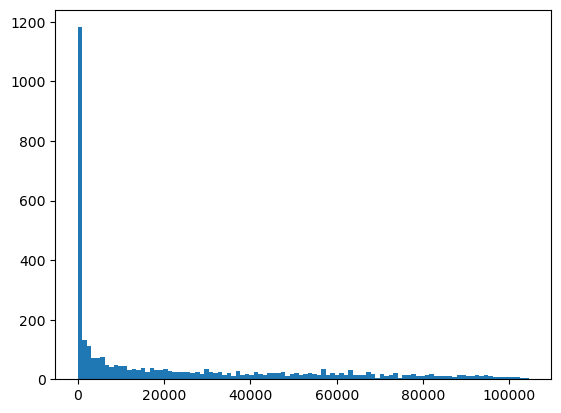

Number pot:  3477


In [2]:
import numpy as np
from scipy.stats import multivariate_normal

def ExtractCenterByPopulation(grid):
    assert 'population' in grid.columns
    population = grid['population'].copy()
    center_idx = np.argmax(population)
    coords_center = np.array([grid['centroidx'][center_idx],grid['centroidy'][center_idx]]) 
    return coords_center,center_idx

def ExtractKeyFromValue(dict_,value):
    for key, val in dict_.items():
        if val == value:
            return key
case_center = 'CenterByPopulation'
if case_center == 'CenterByPopulation':
    coords_center = ExtractCenterByPopulation(grid)
else:
    raise ValueError('We must choose a center and by Population is the only one implemented')

InfoPopulation = {'grid':grid}

idx2array = {j*57+ i: [i,j] for j in range(57) for i in range(61)}
# Set the number of peaks
num_peaks = 4
# CENTER
coords_center,center_idx = ExtractCenterByPopulation(grid)
arrayid = idx2array[center_idx]
# CENTER 2
arrayid2 = [arrayid[0] + 10 ,arrayid[1] -7]
coords_center2 = [grid['centroidx'][ExtractKeyFromValue(idx2array,arrayid2)],grid['centroidy'][ExtractKeyFromValue(idx2array,arrayid2)]]
arrayid2 = [arrayid[0] -8 ,arrayid[1] + 10]
coords_center3 = [grid['centroidx'][ExtractKeyFromValue(idx2array,arrayid2)],grid['centroidy'][ExtractKeyFromValue(idx2array,arrayid2)]]
arrayid2 = [arrayid[0] -10 ,arrayid[1] -15]
coords_center4 = [grid['centroidx'][ExtractKeyFromValue(idx2array,arrayid2)],grid['centroidy'][ExtractKeyFromValue(idx2array,arrayid2)]]

# Set the mean and covariance matrix for each peak
means = np.array([[coords_center[0], coords_center[1]], [coords_center2[0], coords_center2[1]],[coords_center3[0], coords_center3[1]],[coords_center4[0], coords_center4[1]]])
covariances = np.array([[[10, 0], [0, 4.5]], [[5, 0], [0, 9]], [[6, 0], [0, 9]], [[7, 0], [0, 8]]])
centers = np.array([coords_center, coords_center2,coords_center3,coords_center4])
# Generate the potential values for each grid
potential_values = np.zeros(len(grid))
count_center = 0
for center in centers:
    for i in range(len(grid)):
        point = np.array([grid['centroidx'][i], grid['centroidy'][i]])
#        print('Coords Projected: ',ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))
#        print('norm: ',np.linalg.norm(ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))**2)
#        print('covariance: ',covariances[count_center][0][0]**2 + covariances[count_center][1][1]**2)
        potential_values[i] += 187652*np.exp(-(np.linalg.norm(ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))/(10**3))**2/(covariances[count_center][0][0]**2 + covariances[count_center][1][1]**2))/2#multivariate_normal.pdf(grid_center, mean=means[j], cov=covariances[j])
        print('distance squared: ',(np.linalg.norm(ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))/(10**3))**2)
        print('covariance: ',(covariances[count_center][0][0]**2 + covariances[count_center][1][1]**2))
        print('fraction: ',(np.linalg.norm(ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))/(10**3))**2/(covariances[count_center][0][0]**2 + covariances[count_center][1][1]**2))        
        print('potential: ',potential_values[i])
    count_center += 1
plt.hist(potential_values, bins=100)
plt.show()
print('Number pot: ',len(potential_values[potential_values>0]))
# Add the new column to the potentialdataframe
PotentialDataframe['new_potential'] = potential_values


# PLOT ABSTRACT CCS

index Fstar:  2320
cumulative:  [1.21002129e-18 4.84008515e-18 1.93603406e-17 ... 9.94871766e-01
 9.97396116e-01 1.00000000e+00]
x:  [0.00000000e+00 3.69822485e-04 7.39644970e-04 ... 9.98890533e-01
 9.99260355e-01 9.99630178e-01]
x[idxFstar]:  0.8579881656804734
2320
index Fstar:  2699
cumulative:  [1.17266547e-12 2.60559342e-12 4.59262599e-12 ... 9.97430693e-01
 9.98714898e-01 1.00000000e+00]
x:  [0.00000000e+00 2.87604257e-04 5.75208513e-04 ... 9.99137187e-01
 9.99424791e-01 9.99712396e-01]
x[idxFstar]:  0.7762438884095485
2699


Text(0.5, 1.0, 'Critical Exponent')

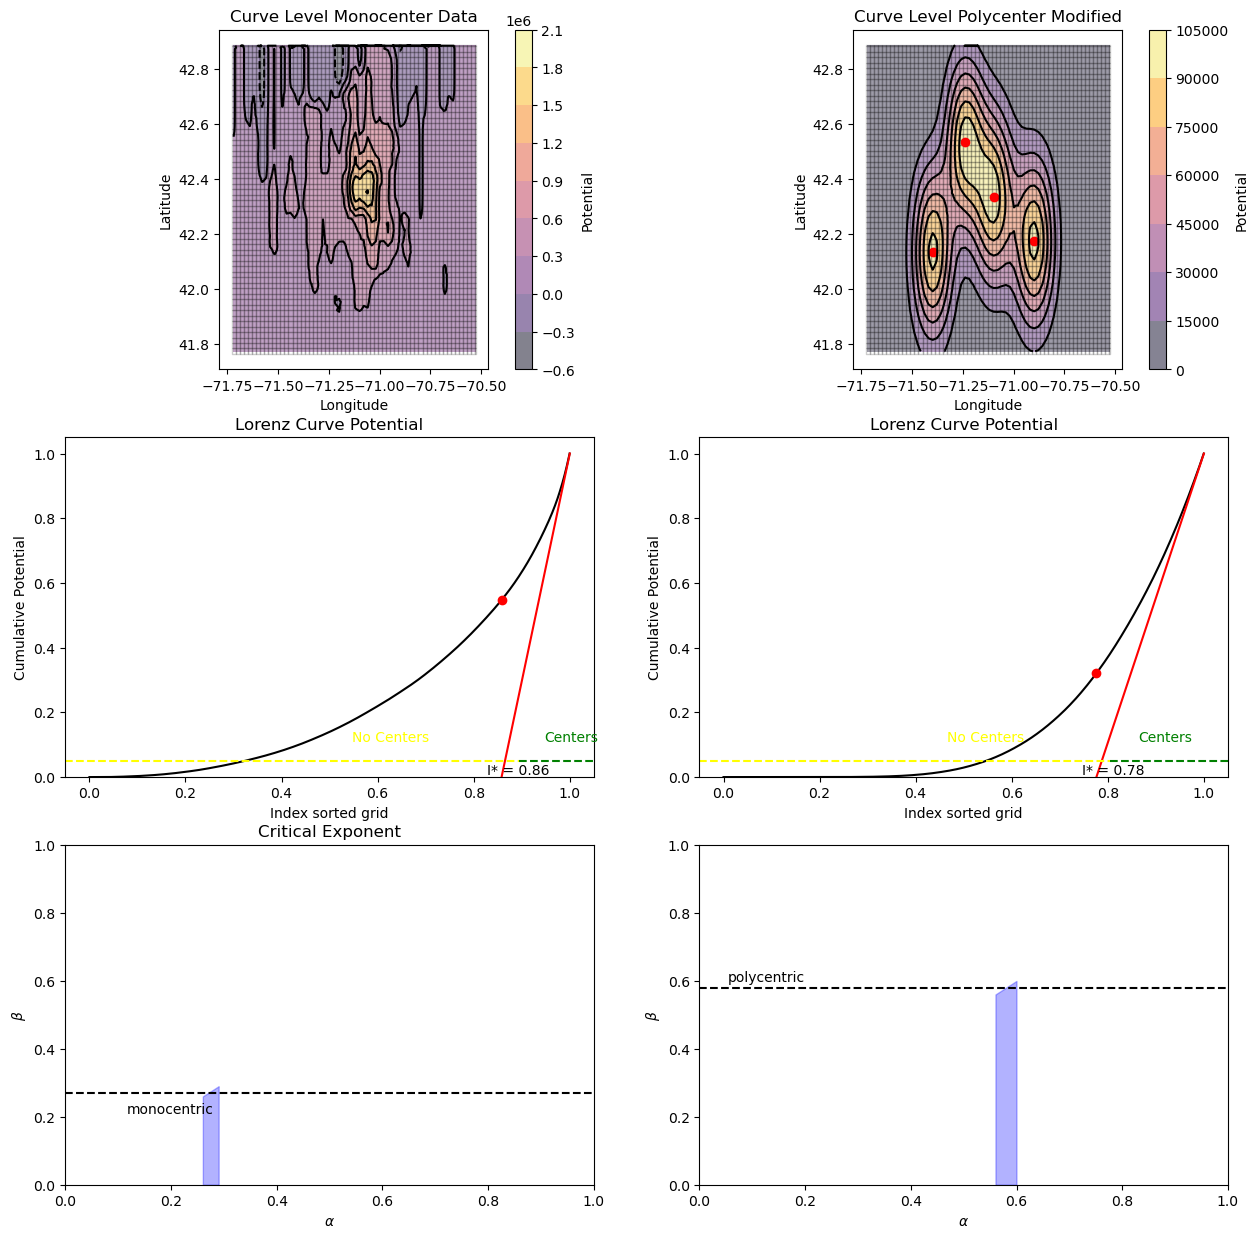

In [16]:
plt.rcParams['text.usetex']=False
def LorenzCenters(potential):
    '''
        Input:
            Potential from grid.
        This function computes the indices of the centers in the linearized grid.
        We are using here the index column and not the double index.
    '''
    # Step 1: Sort the potential and compute the sorting map
    sorted_indices = np.argsort(potential)
    # Step 2: Compute the cumulative distribution
    sorted_potential = potential[sorted_indices]
    cumulative = np.cumsum(sorted_potential)
    # Step 3: Determine the angle and delta index
#    print('cumulative: ',cumulative[-1],cumulative[-2])
    angle = cumulative[-1] - cumulative[-2]
#    print('angle: ',angle)
    Fstar = int(len(cumulative) +1 -cumulative[-1]/angle)
#    print('Fstar: ',Fstar)
#    print('index: ',int(Fstar*len(cumulative)))
#    plt.show()
    # Step 4: Retrieve the indices based on the delta index and mapping
    result_indices = [sorted_indices[-i] for i in range(len(cumulative) - int(Fstar))]
    cumulative = cumulative/np.sum(sorted_potential)
    return result_indices,angle,cumulative,Fstar

def PlotLorenzCurve(ax,cumulative,Fstar,result_indices,shift = 0.1):
    x = np.arange(len(cumulative))/len(cumulative)
    idxFstar = Fstar #int(Fstar*len(cumulative))
    print('index Fstar: ',Fstar)
    print('cumulative: ',cumulative)
    print('x: ',x)
    print('x[idxFstar]: ',x[idxFstar])
    line1, = ax.plot(x,cumulative,c='black',label='Potential')
    # Plot the straight line to F*
    line2, = ax.plot([x[idxFstar], 1], [0, cumulative[-1]], color='red',label = 'Potential angle')
    ax.plot(x[idxFstar],cumulative[idxFstar],'ro',label='Potential F*')
    if result_indices is not None:
        ax.text(x[Fstar] + shift, 0, f'I* = {x[Fstar]:.2f}', ha='right', va='bottom', color='black')
        ax.text(x[Fstar] + 2*shift , 0.1, f'Centers', ha='right', va='bottom', color='green')
        ax.text(x[Fstar] - 1.5*shift , 0.1, f'No Centers', ha='right', va='bottom', color='yellow')        
        ax.axhline(y=0.05, xmin=0 , xmax=(x[Fstar]), color='yellow', linestyle='--')
        ax.axhline(y=0.05, xmin=x[Fstar], xmax=1, color='green', linestyle='--')
        print(Fstar)
    ax.set_ylim(0)
    ax.set_title('Lorenz Curve Potential')
    ax.set_xlabel('Index sorted grid')
    ax.set_ylabel('Cumulative Potential')
    return line1,line2


#merged_grid['geometry'] = merged_grid['geometry_x']
#merged_grid.plot(column='population', cmap='viridis', legend=True)

fig,ax = plt.subplots(3,2,figsize = (15,15))
grid['potential'] = PotentialDataframe['V_out']

grid['new_potential'] = PotentialDataframe['new_potential']
contour_filled = ax[0][0].tricontourf(grid['geometry'].apply(lambda geom: geom.centroid.x), 
                                 grid['geometry'].apply(lambda geom: geom.centroid.y), 
                                 grid['potential'], cmap='inferno', alpha=0.5)

# Create contour lines
contour_lines = ax[0][0].tricontour(grid['geometry'].apply(lambda geom: geom.centroid.x), 
                               grid['geometry'].apply(lambda geom: geom.centroid.y), 
                               grid['potential'], colors='black')

#contour = ax.tricontour(grid['geometry'].apply(lambda geom: geom.centroid.x), 
#                         grid['geometry'].apply(lambda geom: geom.centroid.y), 
#                         grid['potential'], alpha=1, cmap='inferno')

cbar = plt.colorbar(contour_filled)
cbar.set_label('Potential')
ax[0][0].set_title('Curve Level Monocenter Data')
ax[0][0].set_xlabel('Longitude')
ax[0][0].set_ylabel('Latitude')

contour_filled = ax[0][1].tricontourf(grid['geometry'].apply(lambda geom: geom.centroid.x), 
                                 grid['geometry'].apply(lambda geom: geom.centroid.y), 
                                 grid['new_potential'], cmap='inferno', alpha=0.5)

# Create contour lines
contour_lines = ax[0][1].tricontour(grid['geometry'].apply(lambda geom: geom.centroid.x), 
                               grid['geometry'].apply(lambda geom: geom.centroid.y), 
                               grid['new_potential'], colors='black')

grid.plot(ax=ax[0][0], color='white', edgecolor='black',alpha = 0.2)
grid.plot(ax=ax[0][1], color='white', edgecolor='black',alpha = 0.2)

#contour = ax.tricontour(grid['geometry'].apply(lambda geom: geom.centroid.x), 
#                         grid['geometry'].apply(lambda geom: geom.centroid.y), 
#                         grid['potential'], alpha=1, cmap='inferno')

cbar = plt.colorbar(contour_filled)
cbar.set_label('Potential')
ax[0][1].set_title('Curve Level Polycenter Modified')
ax[0][1].set_xlabel('Longitude')
ax[0][1].set_ylabel('Latitude')
ax[0][1].scatter(means[0][0],means[0][1],color = 'red')
ax[0][1].scatter(means[1][0],means[1][1],color = 'red')
ax[0][1].scatter(means[2][0],means[2][1],color = 'red')
ax[0][1].scatter(means[3][0],means[3][1],color = 'red')
x = np.linspace(0,1,len(cumulative))
y = np.linspace(0,1,len(cumulative))
result_indices,angle,cumulative,Fstar = LorenzCenters(Potential.loc[Potential['V_out']>0]['V_out'].to_numpy())
PlotLorenzCurve(ax[1][0],cumulative,Fstar,result_indices,shift = 0.1)
result_indices,angle,cumulative,Fstar = LorenzCenters(Potential.loc[Potential['new_potential']>0]['new_potential'].to_numpy())
PlotLorenzCurve(ax[1][1],cumulative,Fstar,result_indices,shift = 0.1)
ax[2][1].axhline(y=0.58, xmin=0 , xmax=1, color='black', linestyle='--')
ax[2][1].axhline(y=0.6, xmin=0 , xmax=1, color='red', linestyle='--')
ax[2][1].axhline(y=0.56, xmin=0 , xmax=1, color='red', linestyle='--')
ax[2][1].set_ylim(0,1)
ax[2][1].set_xlim(0,1)
ax[2][1].text(0.2,0.59,'polycentric', ha='right', va='bottom', color='black')
ax[2][1].annotate('trantisition polycentrism', xy=(0.2, 0.59), xytext=(0.2, 0.59),
            arrowprops=dict(facecolor='black', shrink=0.05,color = 'green'))
#ax[2][1].fill_between(x,y, where=((y >= 0.56) & (y <= 0.60)), color='blue', alpha=0.3)
ax[2][1].set_xlabel(r'$\alpha$')
ax[2][1].set_ylabel(r'$\beta$')
ax[2][0].set_title('Critical Exponent')
ax[2][0].axhline(y=0.27, xmin=0 , xmax=1, color='black', linestyle='--')
ax[2][0].axhline(y=0.25, xmin=0 , xmax=1, color='blue', linestyle='--')
ax[2][0].axhline(y=0.29, xmin=0 , xmax=1, color='blue', linestyle='--')
ax[2][0].set_ylim(0,1)
ax[2][0].set_xlim(0,1)
#ax[2][0].fill_between(x,y, where=((y >= 0.26) & (y <= 0.29)), color='blue', alpha=0.3)
ax[2][0].text(0.28,0.2,'monocentric', ha='right', va='bottom', color='black')
ax[2][0].set_xlabel(r'$\alpha$')
ax[2][0].set_ylabel(r'$\beta$')
ax[2][0].set_title('Critical Exponent')

#plt.savefig('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/potential/curve_levelError.png')

In [ ]:
from tqdm import tqdm
from Polycentrism import *
SumPot = np.sum(PotentialDataframe['V_out']) 
NumGridEdge = grid[grid['relation_to_line']=='edge'].shape[0]
IndexEdge = PotentialDataframe[PotentialDataframe['V_out']>0]['index'].values

distance_vector,potential_vector = PrepareJitCompiledComputeV(df_distance,GetIndexEdgePolygon(grid),SumPot,NumGridEdge,PotentialDataframe,case = 'Vmax')
Vmax = ComputeJitV(distance_vector,potential_vector)
distance_vector,potential_vector = PrepareJitCompiledComputeV(df_distance,GetIndexEdgePolygon(grid),SumPot,NumGridEdge,PotentialDataframe,case = 'V')
V = ComputeJitV(distance_vector,potential_vector)
PI = ComputePI(V,Vmax)
print('PI: ',PI)


# MODIFY POLYCENTRICITY

##### 

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal


def ExtractCenterByPopulation(grid):
    assert 'population' in grid.columns
    population = grid['population'].copy()
    center_idx = np.argmax(population)
    coords_center = np.array([grid['centroidx'][center_idx],grid['centroidy'][center_idx]]) 
    return coords_center,center_idx

def ExtractKeyFromValue(dict_,value):
    for key, val in dict_.items():
        if val == value:
            return key


idx2array = {j*57+ i: [i,j] for j in range(57) for i in range(61)}
# Set the number of peaks
num_peaks = 4
# CENTER
coords_center,center_idx = ExtractCenterByPopulation(grid)
arrayid = idx2array[center_idx]
# CENTER 2
arrayid2 = [arrayid[0] + 10 ,arrayid[1] -7]
coords_center2 = [grid['centroidx'][ExtractKeyFromValue(idx2array,arrayid2)],grid['centroidy'][ExtractKeyFromValue(idx2array,arrayid2)]]
arrayid2 = [arrayid[0] -8 ,arrayid[1] + 10]
coords_center3 = [grid['centroidx'][ExtractKeyFromValue(idx2array,arrayid2)],grid['centroidy'][ExtractKeyFromValue(idx2array,arrayid2)]]
arrayid2 = [arrayid[0] -10 ,arrayid[1] -15]
coords_center4 = [grid['centroidx'][ExtractKeyFromValue(idx2array,arrayid2)],grid['centroidy'][ExtractKeyFromValue(idx2array,arrayid2)]]

# Set the mean and covariance matrix for each peak
means = np.array([[coords_center[0], coords_center[1]], [coords_center2[0], coords_center2[1]],[coords_center3[0], coords_center3[1]],[coords_center4[0], coords_center4[1]]])
covariances = np.array([[[10, 0], [0, 4.5]], [[5, 0], [0, 9]], [[6, 0], [0, 9]], [[7, 0], [0, 8]]])
centers = np.array([coords_center, coords_center2,coords_center3,coords_center4])
# Generate the potential values for each grid
potential_values = np.zeros(len(grid))
count_center = 0
for center in centers:
    for i in range(len(grid)):
        point = np.array([grid['centroidx'][i], grid['centroidy'][i]])
#        print('Coords Projected: ',ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))
#        print('norm: ',np.linalg.norm(ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))**2)
#        print('covariance: ',covariances[count_center][0][0]**2 + covariances[count_center][1][1]**2)
        potential_values[i] += 187652*np.exp(-(np.linalg.norm(ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))/(10**3))**2/(covariances[count_center][0][0]**2 + covariances[count_center][1][1]**2))/2#multivariate_normal.pdf(grid_center, mean=means[j], cov=covariances[j])
        print('distance squared: ',(np.linalg.norm(ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))/(10**3))**2)
        print('covariance: ',(covariances[count_center][0][0]**2 + covariances[count_center][1][1]**2))
        print('fraction: ',(np.linalg.norm(ProjCoordsTangentSpace(center[0],center[1],point[0],point[1]))/(10**3))**2/(covariances[count_center][0][0]**2 + covariances[count_center][1][1]**2))        
        print('potential: ',potential_values[i])
    count_center += 1
plt.hist(potential_values, bins=100)
plt.show()
print('Number pot: ',len(potential_values[potential_values>0]))
# Add the new column to the potentialdataframe
PotentialDataframe['new_potential'] = potential_values


In [6]:

def ComputeVectorFieldModified(Tij,df_distance):
    Tij['vector_flux'] = df_distance['dir_vector'].apply(lambda x: parse_dir_vector(x) ) * Tij['number_people']

    # Create VectorField DataFrame
    VectorField = pd.DataFrame(index=Tij['(i,j)D'].unique(), columns=['(i,j)', 'Ti', 'Tj'])
    Tj_values = Tij.groupby('(i,j)D')['vector_flux'].sum()
    VectorField['Tj'] = Tj_values

    # Calculate 'Ti' values
    Ti_values = Tij.groupby('(i,j)O')['vector_flux'].sum()
    VectorField['Ti'] = Ti_values
    VectorField['index'] = VectorField.index
    VectorField['(i,j)'] = VectorField['index']
    VectorField['index'] = VectorField.index
    VectorField.reset_index(inplace=True)
    return VectorField

def fill_zeros_with_fit(vector):
    # Find indices of non-zero values
    non_zero_indices = np.where(vector != 0)[0]
    
    # Use non-zero indices to fit values
    fitted_values = np.interp(np.arange(len(vector)), non_zero_indices, vector[non_zero_indices])
    
    # Replace zeros with fitted values
    filled_vector = np.where(vector == 0, fitted_values, vector)
    
    return filled_vector

def IdxGrid2IdxBin(pop, idxgrid, bins):
    mask = [(pop[idxgrid] >= bins[j]) and (pop[idxgrid] <= bins[j + 1]) for j in range(len(bins) - 1)]
    indices = [j for j, m in enumerate(mask) if m]
    return indices

def UpdatePolycentricPop(population,index,index1,NCell2DividePop):
    population[index1] += population[index]/NCell2DividePop  
    population[index] = population[index]/NCell2DividePop
    return population

def UpdateMonocentricPop(population,index,index1):
    population[index1] += population[index]
    population[index] = 0
    return population

def ReassignPopulationRandomly(grid, m0, r0, N, transform_toward = 'monocentric',geometricl_influence = False):
    '''
        Input:
            grid: Grid with info about population and distance
            m0: Parameter, 66% of grid, have mass in the interval [0,m0]
            r0: Parameter, 66% of grid, have distance in the interval [0,r0]
            N: Number of repetitions 
            transfrom_toward: 'monocentric', 'policentric'
        Output:
            population: np.array Population Modified 
            evolution_mean: np.array -> Since during the population is redestributed then the mean changes as the number of grids that have population changes
            evolution_number_centers: np.array -> Number of centers that change
            population_moved: float: Total Population has moved after the simulation
            evolution_population_moved: np.array How much population is moved in the ITERATIONS
        This function reassign population according to ModifyPop principles.
        Takes the probability to reassign depending on the distance from the center.

    '''    
    evolution_mean = []
    evolution_number_centers = []
    fraction_times_change_pop = 0
    population_moved = 0
    evolution_population_moved = []
    # POPULATION
    population = grid['population'].copy()
    center_idx = np.argmax(population)
    coords_center = np.array([grid['centroidx'][center_idx],grid['centroidy'][center_idx]]) 
    indices = np.where(population > 0)[0]  # Step 1
    n,bins = np.histogram(population,500)
    # GET POPULATION DISTRIBUTION
    p = n/np.sum(n)
    p1 = fill_zeros_with_fit(p)
    for _ in range(N):
        # CONSIDER JUST THE GRIDS WITH POPULATION>0 
        indices = np.where(population > 0)[0]  
        # PICK RANDOMLY THE GRID WHOSE POPULATION WILL BE SET TO 0 if satisfy the right criterium
        index = np.random.choice(indices)
        # FIND THE BIN in which it lies
        # NOTE: Since index is in indices I must look at population[indices] -> filtered with just populated grids 
        assert index in indices
        binidx = IdxGrid2IdxBin(population[indices], index, bins)[0]

        # TAKE PROBABILITY OF THE MEASURED POPULATION 
        pl_value = p1[binidx]
        # TAKE THE FAKE DISTRIBUTION
        exp_value = np.exp(-bins[binidx]/m0)

        # EVOLUTION AVERAGE & NUMBER CENTERS
        # NOTE: DEBUGGING PORPOUSES -> Takes track of the population distribution
        evolution_mean.append(np.mean(population[indices]))
        evolution_number_centers.append(len(indices))
        if transform_toward == 'monocentric':
            # REASSIGN THE 'LOW POPULATED GRIDS'
            if pl_value > exp_value:  
#            print('Mass extracted: ',mass_extracted)
#            print('Expo prob: ',exp_value)
#            print('Power Law prob: ',pl_value)
#            print('Population going 0: ',population[index])
                fraction_times_change_pop +=1     
                # CHOOSE THE REASSIGNED GRID AMONG POPULATED GRIDS       
                index1 = np.random.choice(indices)
                while(population[index1]==0):
                    index1 = np.random.choice(indices)
                    # NOTE: IMPOSE that the reassignment to stay close to the center.
                    if geometricl_influence:
                        while(np.exp(-r/r0)>p):
                            index1 = np.random.choice(indices)
                            center_extracted = np.array([grid['centroidx'][index1],grid['centroidy'][index1]])
                            r = ProjCoordsTangentSpace(coords_center[0],coords_center[1],center_extracted[0],center_extracted[1])
                        population_moved += population[index]
                        evolution_population_moved.append(population_moved)
                        population = UpdateMonocentricPop(population,index,index1)                    
                    else:
                        population_moved += population[index]
                        evolution_population_moved.append(population_moved)
                        population = UpdateMonocentricPop(population,index,index1)
#            print('Population increased: ',population[index1])
            else:
                evolution_population_moved.append(population_moved)
        if transform_toward == 'polycentric':
            # REASSIGN THE 'LOW POPULATED GRIDS'
            if pl_value < exp_value:  
                fraction_times_change_pop +=1     
                # CHOOSE THE REASSIGNED GRID AMONG POPULATED GRIDS       
                index1 = np.random.choice(indices)
                # AVG POPULATION TO CONTROL HOW MANY POP TO SPREAD TO
                avg_pop = np.mean(population[indices])
                NCell2DividePop= int(population[index]/avg_pop)
                # DIVIDE THE POPULATION IN NCell2DividePop Parts so that the distribution will be more spreaded
                for Cell in range(NCell2DividePop):
                    while(population[index1]==0):
                        index1 = np.random.choice(indices)
                        # NOTE: IMPOSE that the reassignment to stay close to the center.
                        if geometricl_influence:
                            while(np.exp(-r/r0)>p):
                                index1 = np.random.choice(indices)
                                center_extracted = np.array([grid['centroidx'][index1],grid['centroidy'][index1]])
                                r = ProjCoordsTangentSpace(coords_center[0],coords_center[1],center_extracted[0],center_extracted[1])
                            population_moved += population[index]/NCell2DividePop
                            evolution_population_moved.append(population_moved)
                            population = UpdatePolycentricPop(population,index,index1,NCell2DividePop)
                        else:
                            # MOVE THE FRACTION OF PEOPLE THAT ARE MORE THEN AVERAGE TOWARD AVERAGE
                            population_moved += population[index]/NCell2DividePop
                            evolution_population_moved.append(population_moved)
                            population = UpdatePolycentricPop(population,index,index1,NCell2DividePop)

    #            print('Population increased: ',population[index1])
            else:
                evolution_population_moved.append(population_moved)
            
    print('Fraction Changed: ',fraction_times_change_pop/N)
    print('Total Grids Changed: ',fraction_times_change_pop)
    print('Total number Population Moved: ',population_moved)
    return population,evolution_mean,evolution_number_centers,population_moved,evolution_population_moved


3010.0008695535003
16254.004695588903
28494.674898439804


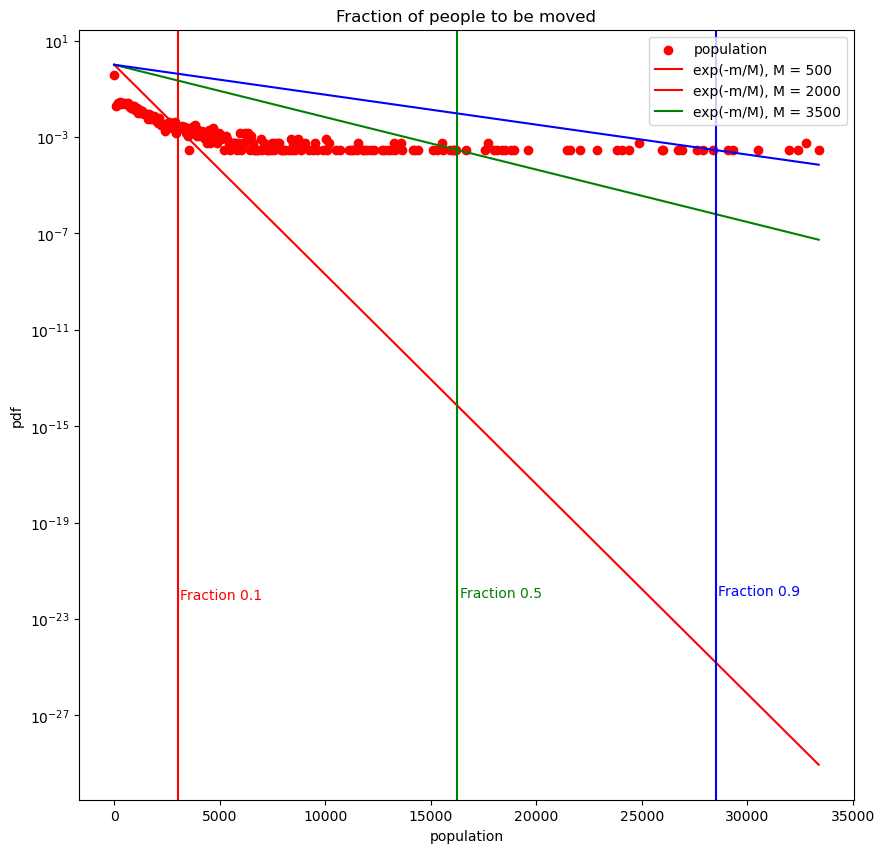

Final 0.0015763106331130763


In [180]:
def PlotComparisonMass2ExpDistr(population,a,partition_population = 500,shift = 2000):
    '''
        Given a population distribution and exponential characteristics:
            - Determines the fraction of grids that have less population then 
    '''
    n,bins = np.histogram(population,partition_population)
    x = -np.linspace(bins[0],bins[-1],partition_population)

n,bins = np.histogram(grid['population'],500)
shift = 2000
x = -np.linspace(bins[0],bins[-1],500)
deltax = bins[1] - bins[0]
expa = []
EvolutionExpNumber = 3
colordict = colors = ["red","green","blue","yellow"]

legend = ['population']
p = n/np.sum(n)
p1 = fill_zeros_with_fit(p)
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.scatter(bins[:-1],p,color = 'red')
i = 0
for a in np.linspace(500,3500,EvolutionExpNumber):
    Aa = 1/(1-np.exp(-deltax/a))
    exp_ = np.exp(x/a)
    abs_diff = np.abs(exp_ - p1)
#    print('exp: ',exp_)
#    print('Diff: ',abs_diff)

    # Find the index of the minimum difference
    min_diff_index = np.argmin(abs_diff)
#    print('A: ',Aa,' deltax: ',deltax/a,' sum(exp): ',np.sum(exp_),' Error approx: ',np.sum(exp_)-Aa)
    # GET POPULATION DISTRIBUTION
    ax.plot(bins[:-1],exp_,label = a,color = colors[i])#/(bins[-1]-bins[0])
    ax.axvline(bins[min_diff_index],color = colors[i])
    plt.text(bins[min_diff_index] + 2*shift , (i+5)*(10**(-23)), f'Fraction {round(bins[min_diff_index]/bins[-1],1)}', ha='right', va='bottom', color=colors[i])
#    plt.axhline(y=(i+3)*(10**(-23)), xmin=0, xmax=bins[min_diff_index], color=colors[i], linestyle='--')

    print(bins[min_diff_index])
    legend.append('exp(-m/M), M = {}'.format(int(a)))
    i += 1
plt.legend(legend)    
plt.yscale('log')
ax.set_xlabel('population')
ax.set_ylabel('pdf')
ax.set_title('Fraction of people to be moved')
plt.savefig('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/grid/0.02/FractionMoved.png',dpi = 200)
plt.show()
print('Final',np.sum(exp_)/(bins[-1]-bins[0]))

#plt.scatter(np.linspace(1,bins[-1],EvolutionExpNumber),expa)
#plt.xscale('log')
#plt.yscale('log')
#plt.show()


In [188]:
with open('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/potential/FitVespignani.json','r')as f:
    fitGLM = json.load(f)
#with open('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/potential/FitPlMass.json','r') as f:
#    fitplM = json.load(f)

In [ ]:
fractions = np.linspace(1,15,15)
r0 = 10
N = 2000 
for fraction in fractions:
    m01 = m0 + m0*fraction
    population, evolution_mean,evolution_number_centers,population_moved,evolution_population_moved = ReassignPopulationRandomly(grid, m0, r0, N) 
#    ReassignPopulationRandomly(grid, m0, fitplM['A'],fitplM['b'], 2000)
    PopChanged, PopChangedBins = np.histogram(population,40)
    PopChanged = PopChanged/np.sum(PopChanged)
    grid['changed_population'] = population
    fig,ax = plt.subplots(1,1,figsize = (12,12))
    SFO_obj.gdf_polygons.plot(ax=ax, color='white', edgecolor='black')
    grid_plot = grid.plot(column='changed_population', cmap='viridis', edgecolor='black', alpha=0.3, legend=True, ax=ax)
    ax.set_title('Population Boston Changed')
    plt.savefig(os.path.join(dir_grid,'populationBoston.png'),dpi = 200)    
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    ax.scatter(PopDataBins[:-1],PopData,color = 'red',label = 'Data')
    ax.plot(PopBins,PopExpo,color = 'blue',label = 'Expo')
    ax.scatter(PopChangedBins[:-1],PopChanged,color = 'yellow', label = 'Changed Population')
    ax.set_xlabel('Population')
    ax.set_ylabel('pdf')
    ax.set_yscale('log')
    ax.set_title('{}'.format(m01))
    plt.show()

    fig,ax = plt.subplots(1,1,figsize = (10,10))
    ax.plot(np.arange(len(evolution_mean)),evolution_mean,color = 'red',label = 'Mean')
    ax.plot(np.arange(len(evolution_number_centers)),evolution_number_centers,color = 'blue',label = 'Number Grids with People')
    ax.plot(np.arange(len(evolution_number_centers)),evolution_population_moved,color = 'yellow',label = 'Population Moved')
    ax.set_title('{}'.format(m01))
    ax.set_xlabel('Iteration')
    ax.set_yscale('log')
    ax.legend(['Mean Population','Number of Grids with People','Population Moved'])
    plt.show()


# GET Vec Field & Pot

In [54]:
ComputeInitPotential = True
ComputeInitVF = True
if ComputeInitVF:
    VectorField = GetVectorField(Tij,df_distance)
    VectorFieldDir = os.path.join(TRAFFIC_DIR,'data','carto',name,'grid',str(grid_size))
    SaveVectorField(VectorField,VectorFieldDir)

if ComputeInitPotential:
    lattice = GetPotentialLattice(lattice,VectorField)
    lattice = SmoothPotential(lattice)
    PotentialDataframe = ConvertLattice2PotentialDataframe(lattice)
    PotentialDataframe = CompletePotentialDataFrame(VectorField,grid,PotentialDataframe)
    SavePotentialDataframe(PotentialDataframe,dir_grid)


# MODIFY  

In [ ]:
## TODO: Modify Population -> Compute Fluxes -> Get Vector Field -> Compute Modified Potential -> Compute Lorenz -> Compute OD

with open('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/potential/FitFluxesParameters.json','r')as f:
    fitGLM = json.load(f)
p0 = fraction

Population = ModifyPop(Population)
Tij_modified = ComputeFluxesModifiedPopulation(Population) 
VectorField = ComputeVectorFieldModified(Tij,df_distance)
Potential = ComputePotentialModified(VectorField)

p = ComputeLorenzCurve(Potential)
OD_DemandFromFluxes()

# MODIFIED OD CREATION

In [ ]:
with open('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/grid/0.02/origindest2grid.json','r') as f:
    OD2grid = json.load(f)

with open('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/grid/0.02/grid2origindest.json','r') as f:
    grid2OD = json.load(f)
with open('/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/osmid2idx.json') as f:
    osmid2index = json.load(f)

def CumulativeODFromGrid(O_vector,D_vector,OD_vector,osmid2index,grid2OD,start,multiplicative_factor,seconds_in_minute):
    total_number_people_considered = 0
    total_number_people_not_considered = 0
    count_line = 0
    users_id = []
    time_ = []
    origins = []
    destinations = []
    osmid_origin = []
    osmid_destination = []
    print('number of couples of origin-destination: ',len(O_vector))
    for i in range(len(O_vector)):
        origin = O_vector[i]
        destination = D_vector[i]
        number_people = OD_vector[i]
        bin_width = 1                        
        if number_people > 0:
            iterations = multiplicative_factor*number_people/bin_width   
            time_increment = 1/iterations
            for it in range(int(iterations)):
                try:
                    Originbigger0 = len(grid2OD[origin])>0
                except KeyError:
                    total_number_people_not_considered += number_people
                    break
                try:
                    Destinationbigger0 = len(grid2OD[destination])>0
                except KeyError:
                    total_number_people_not_considered += number_people
                    break
                if  Originbigger0 and Destinationbigger0:
                    users_id.append(count_line)
                    t = start*(seconds_in_minute**2) + it*time_increment*seconds_in_minute**2
                    time_.append(t) # TIME IN HOURS
                    i = np.random.randint(0,len(grid2OD[origin]))
                    try:
                        origins.append(osmid2index[grid2OD[origin][i]])
                    except KeyError:
                        total_number_people_not_considered += number_people
                        raise KeyError('KeyError Polygon 2 OD: origin {0} i {1}'.format(origin,i))
                    j = np.random.randint(0,len(grid2OD[destination]))                        
                    try:
                        destinations.append(osmid2index[grid2OD[destination][j]])
                    except KeyError:
                        total_number_people_not_considered += number_people
                        raise KeyError('KeyError Polygon 2 OD: destination {0} j {1}'.format(origin,i))
                    osmid_origin.append(grid2OD[origin][i])
                    osmid_destination.append(grid2OD[destination][j])
                    ## FILLING ORIGIN DESTINATION GRID ACCORDING TO THE ORIGIN DESTINATION NODES
                    count_line += 1
                    total_number_people_considered += 1
    print('total_number_people_considered: ',total_number_people_considered)
    print('total_number_people_not_considered: ',total_number_people_not_considered)
    print('ratio: ',total_number_people_considered/(total_number_people_considered+total_number_people_not_considered))
    return users_id,time_,origins,destinations,osmid_origin,osmid_destination

def OD_from_T_Modified(Tij_modified,
                       CityName2RminRmax,
                       NameCity,
                       osmid2index,
                       grid2OD,
                       p,
                       save_dir_local,
                       start = 7,
                       end = 8
                       ):
    ROutput = []
    # NOTE: ADD HERE THE POSSIBILITY OF HAVING OD FROM POTENTIAL CONSIDERATIONS
    O_vector = Tij_modified['origin']
    D_vector = Tij_modified['destination']
    OD_vector = Tij_modified['number_people']
    # START TAB
    R = np.sum(OD_vector)/3600 # R is the number of people that move in one second (that is the time interval for the evolution )
    Rmin = CityName2RminRmax[NameCity][0]
    Rmax = CityName2RminRmax[NameCity][1]
    spacing = (Rmax/R - Rmin/R)/20
    for multiplicative_factor in np.arange(Rmin/R,Rmax/R,spacing):
        R = np.sum(OD_vector)/3600 
        if os.path.isfile(os.path.join(save_dir_local,'OD','{0}_oddemand_{1}_{2}_R_{3}.csv'.format(NameCity,start,end,int(multiplicative_factor*R)))):
            cprint(os.path.join(save_dir_local,'OD','{0}_oddemand_{1}_{2}_R_{3}.csv'.format(NameCity,start,end,int(multiplicative_factor*R))),'cyan')
            ROutput.append(int(multiplicative_factor*R))
            continue
        else:
            cprint('COMPUTING {}'.format(os.path.join(save_dir_local,'OD','{0}_oddemand_{1}_{2}_R_{3}.csv'.format(NameCity,start,end,int(multiplicative_factor*R)))),'cyan')
            users_id,time_,origins,destinations,osmid_origin,osmid_destination = CumulativeODFromGrid(O_vector,D_vector,OD_vector,osmid2index,grid2OD,start,multiplicative_factor,60)
            df1 = pd.DataFrame({
                'SAMPN':users_id,
                'PERNO':users_id,
                'origin_osmid':osmid_origin,
                'destination_osmid':osmid_destination,
                'dep_time':time_,
                'origin':origins,
                'destination':destinations,
                })
            print('df1:\n',df1.head())
            R = multiplicative_factor*R
            ROutput.append(int(R))
            df1.to_csv('')
    
